# <FONT COLOR = 'BROWN'> HOUSE PRICE PREDICTION USING ARTIFICIAL NEURAL NETWORKS

In [1]:
# importing data analysis modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# importing deep learning modules
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

### Loading the dataset

In [2]:
# Lodaing the data and passing it into a variable called df
df = pd.read_csv('/content/housing.csv')
# displaying the first five rows of the dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# checking the shape of the dataset
df.shape

(20640, 10)

In [4]:
# checking the premilinary information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# peforming statistcal information of the dataset
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
# checking the number of null values in the dataset
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

There are 207 values in the total_bedrooms columns

In [7]:
# performing pearson's correlation coefficient to check the relation of the features
df.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<Axes: >

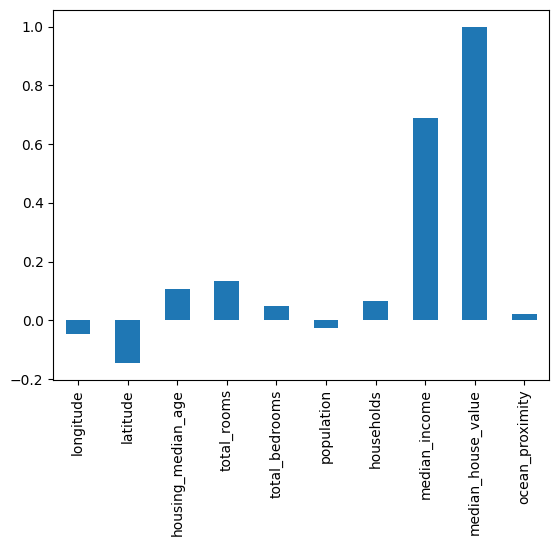

In [37]:
# checking PCC to check the relation of variables to target variable
df.corr(numeric_only=True)['median_house_value'].plot(kind='bar')

Median income, total rooms, housholds are seemed to have positive correlation

In [9]:
# dropping the null values
df.dropna(inplace=True)

### Distributions of the data

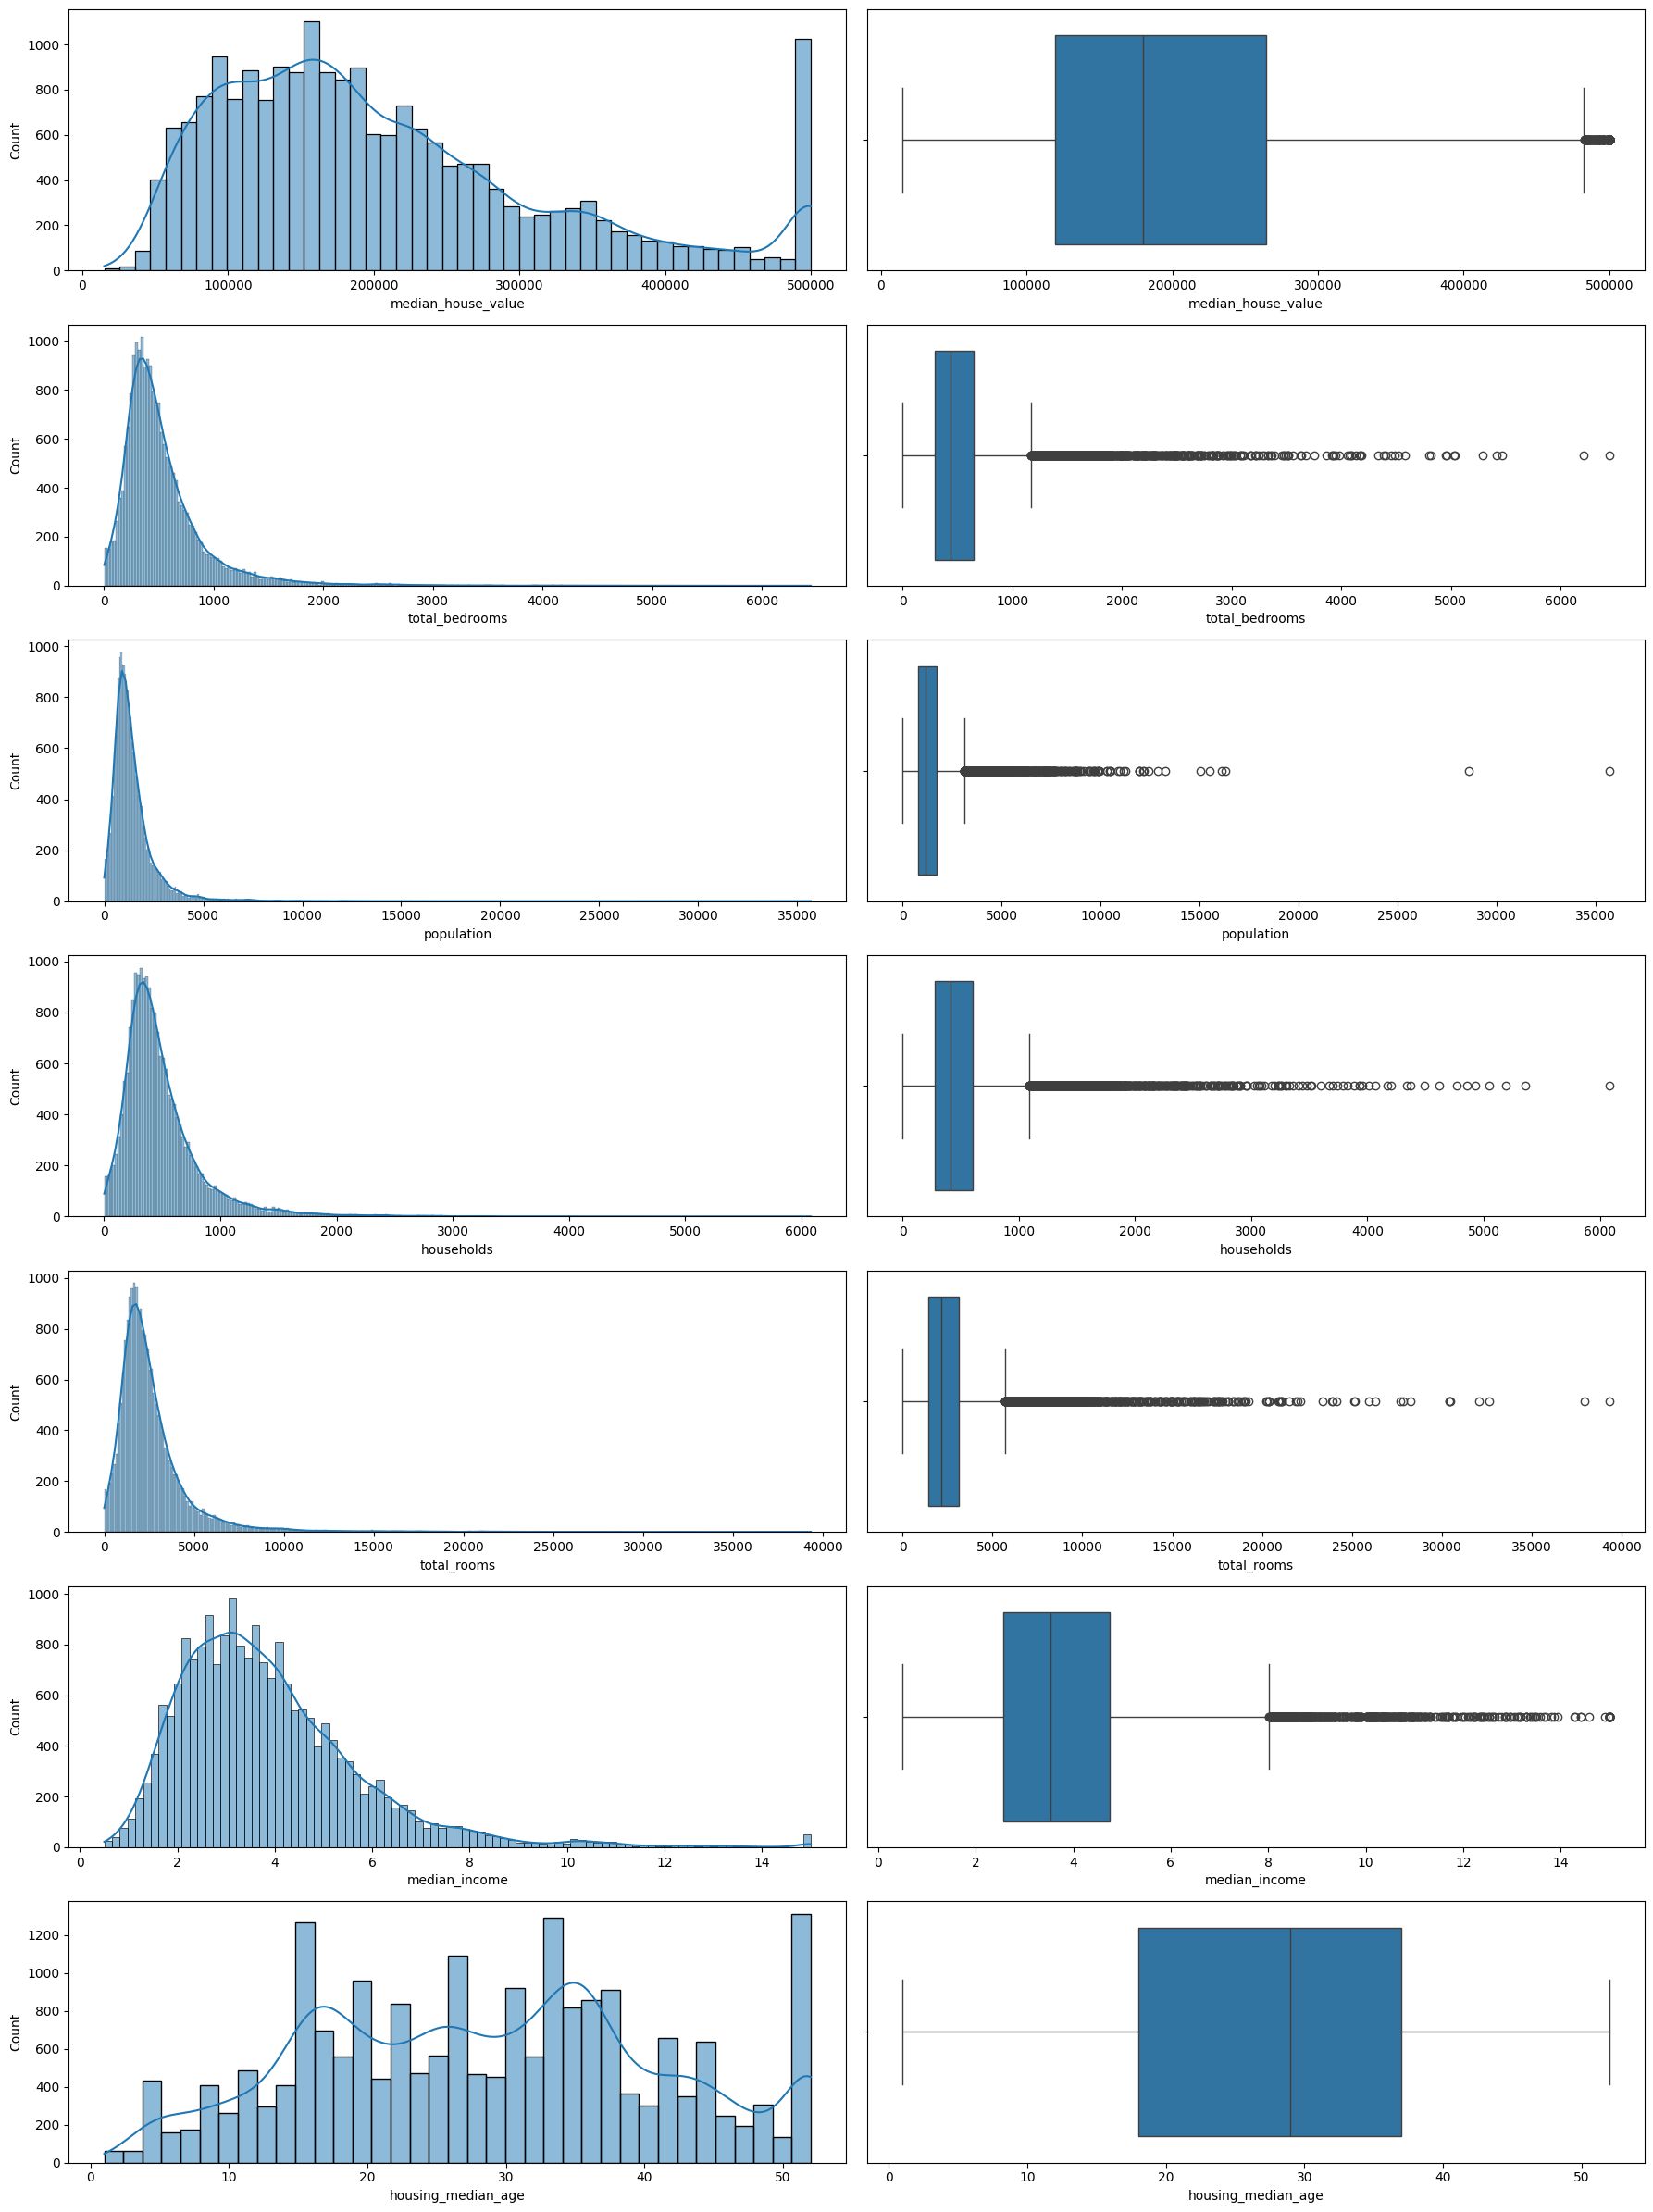

In [10]:
# Creating the subplots
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(18, 24))

# Plotting
sns.histplot(df['median_house_value'], kde=True, ax=axes[0, 0])
sns.boxplot(x=df['median_house_value'], ax=axes[0, 1])

sns.histplot(df['total_bedrooms'], kde=True, ax=axes[1, 0])
sns.boxplot(x=df['total_bedrooms'], ax=axes[1, 1])

sns.histplot(df['population'], kde=True, ax=axes[2, 0])
sns.boxplot(x=df['population'], ax=axes[2, 1])

sns.histplot(df['households'], kde=True, ax=axes[3, 0])
sns.boxplot(x=df['households'], ax=axes[3, 1])

sns.histplot(df['total_rooms'], kde=True, ax=axes[4, 0])
sns.boxplot(x=df['total_rooms'], ax=axes[4, 1])

sns.histplot(df['median_income'], kde=True, ax=axes[5, 0])
sns.boxplot(x=df['median_income'], ax=axes[5, 1])

sns.histplot(df['housing_median_age'], kde=True, ax=axes[6, 0])
sns.boxplot(x=df['housing_median_age'], ax=axes[6, 1])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Data Distribution of Ocean Proximity

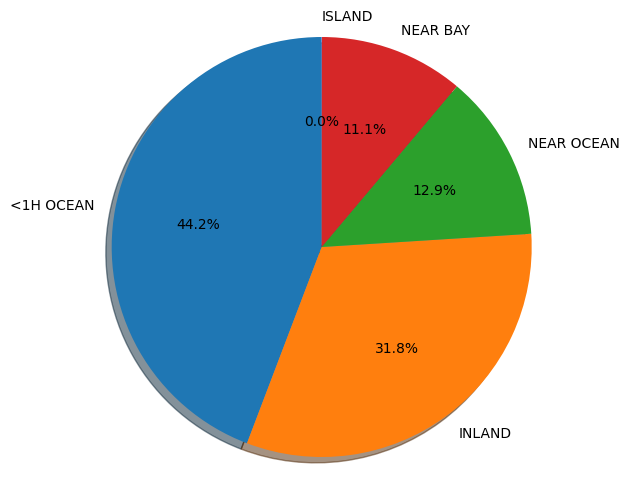

In [11]:
ocean = df['ocean_proximity'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(ocean, labels=ocean.index, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
#plt.title('Distribution of Ocean Proximity')
plt.show()

`Observation`
- The largest section, labeled “<1H OCEAN,” represents 44.2% of the chart. This category likely refers to areas within one hour of an ocean.
- The orange slice, labeled “INLAND,” accounts for 31.8%. This category likely includes non-coastal regions.
- The green section, representing “NEAR OCEAN,” makes up 12.9%. These areas are close to the ocean but not directly on the coast.
- The red slice stands for “NEAR BAY,” constituting 11.1%. These are regions near a bay or inlet.
- Lastly, there’s a very small purple sliver labeled “ISLAND,” which is only 0.0%. This indicates either an absence of islands in the dataset or an extremely tiny proportion.

### Median House Value vs. Total Bedrooms

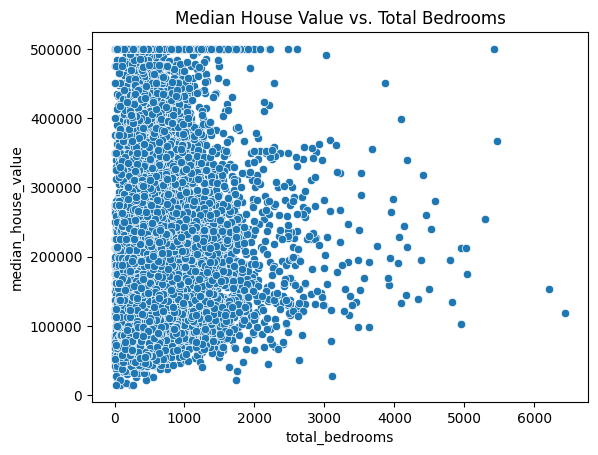

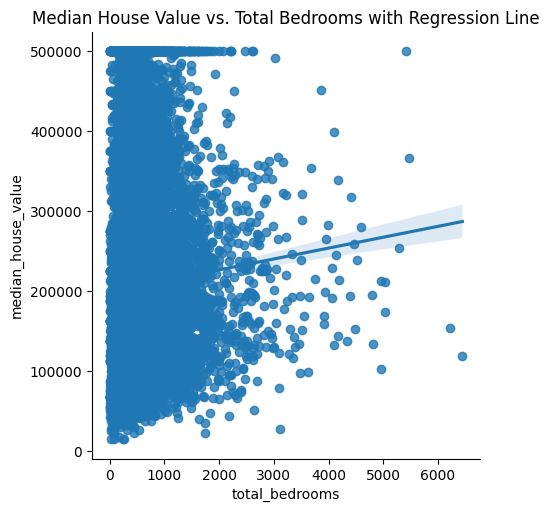

In [12]:
#
sns.scatterplot(x='total_bedrooms', y='median_house_value', data=df)
plt.title('Median House Value vs. Total Bedrooms')
plt.show()

sns.lmplot(x='total_bedrooms', y='median_house_value', data=df)
plt.title('Median House Value vs. Total Bedrooms with Regression Line')
plt.show()


`Observations`:
**Distribution of Data Points:**

- The scatter plot shows individual data points representing different properties.
- Most of the points are concentrated in the lower left quadrant of the graph.
- This suggests that properties with fewer bedrooms tend to have lower median house values.

**Dispersion and Variability:**

- Despite the general trend, there is significant dispersion in house values even for properties with a similar number of bedrooms.
- Some properties with fewer bedrooms have relatively high median values, while others have lower values.

**No Clear Linear Relationship:**

- Unlike a strict linear correlation, the relationship between total bedrooms and median house value is not straightforward.
- We can’t say that adding more bedrooms always leads to a proportional increase in house value.

**Outliers:**

- There are likely outliers in the dataset. These are properties that deviate significantly from the overall trend.
- Outliers could be due to various factors like location, condition, or other features not captured in this plot.

**Relevance and Interpretation:**

- This scatter plot is relevant for analyzing housing market trends and understanding how bedroom count might relate to house value.
- It highlights the need for considering other factors (beyond just bedrooms) when predicting house values.

### Median House Value vs. Population

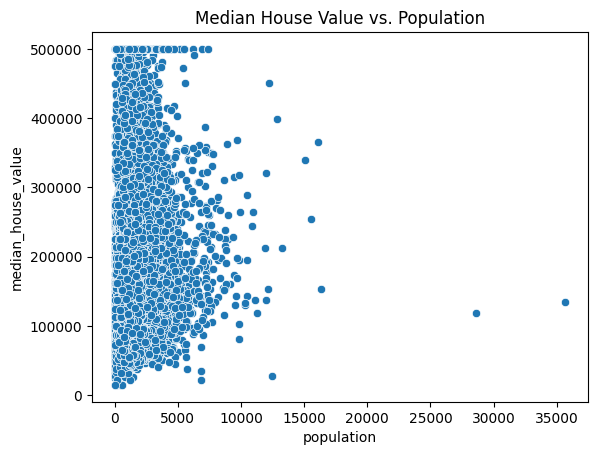

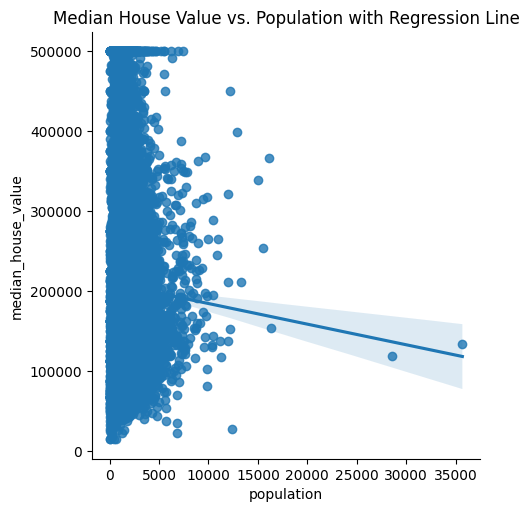

In [13]:
sns.scatterplot(x='population', y='median_house_value', data=df)
plt.title('Median House Value vs. Population')
plt.show()

sns.lmplot(x='population', y='median_house_value', data=df)
plt.title('Median House Value vs. Population with Regression Line')
plt.show()

**`Observation`**
**1. Distribution of Data Points:**

- The scatter plot shows individual data points representing different properties.
- Most of the points are concentrated in the lower left quadrant of the graph.
- This suggests that many areas with smaller populations tend to have lower median house values.

**2. Population vs. Median House Value Trend:**

- As the population increases, there appears to be a slight trend towards higher median house values.
- However, this trend is not strong or consistent across all data points.
- Some outliers with high median house values exist even at lower population levels.

**3. Sparse Data for High Populations:**

- Very few data points exist for areas with populations greater than approximately 25,000.
- Therefore, it’s harder to draw conclusions about the relationship between population size and median house value in more densely populated areas.

**Relevance and Interpretation:**

- This scatter plot is relevant for studies on housing economics or urban planning.
- It visually represents how population size might influence housing costs within different areas.

### Median House Value vs. Households

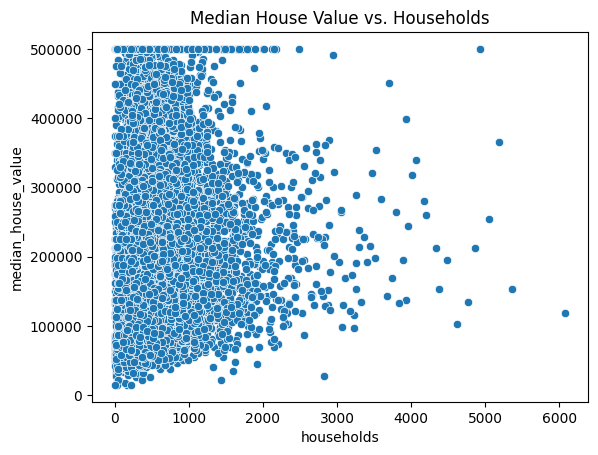

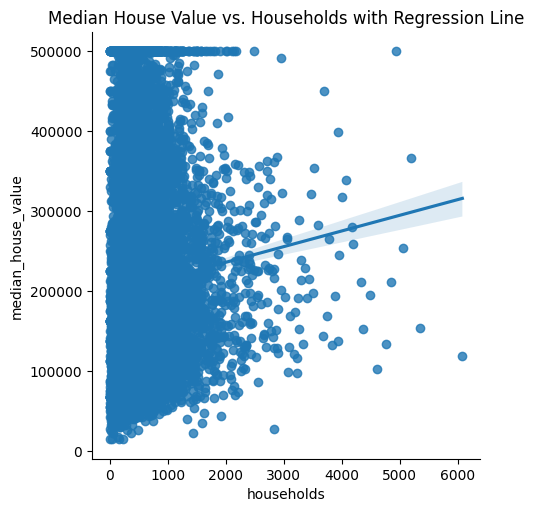

In [14]:
sns.scatterplot(x='households', y='median_house_value', data=df)
plt.title('Median House Value vs. Households')
plt.show()

sns.lmplot(x='households', y='median_house_value', data=df)
plt.title('Median House Value vs. Households with Regression Line')
plt.show()

`Observation`

**Distribution of Data Points:**

- The scatter plot shows individual data points representing different properties.
- Most of the points are concentrated in the lower left quadrant of the graph.
- This suggests that there are many locations with fewer households and lower median house values.

**Households vs. Median House Value Trend:**

- As the number of households increases, there seems to be a slight trend towards higher median house values.
- However, this trend is not strong or consistent across the entire range.
- Some outliers with high median house values exist even at lower household counts.

**Sparse Data for High Households:**

- Very few data points exist for areas with a high number of households (above 4000).
- Therefore, it’s harder to draw conclusions about the relationship between - household density and median house value in densely populated areas.

**Variability in House Prices:**

- The spread of median house values widens as the number of households increases.
- This suggests more variability in house prices in areas with more households.

**No Clear Upper or Lower Limit:**

- There does not appear to be any clear upper or lower limit on the median house value for any given number of households.

### Median House Value vs. Total Rooms

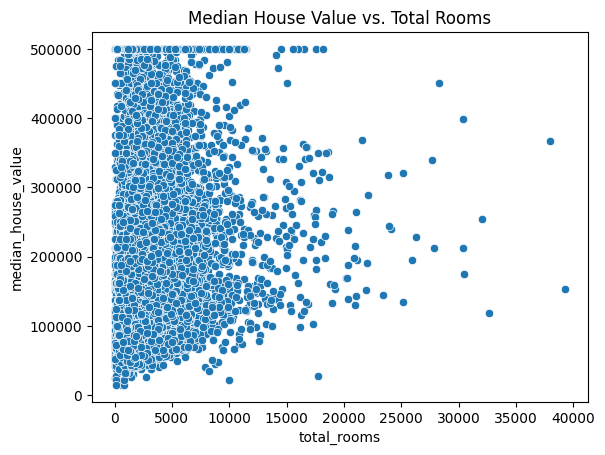

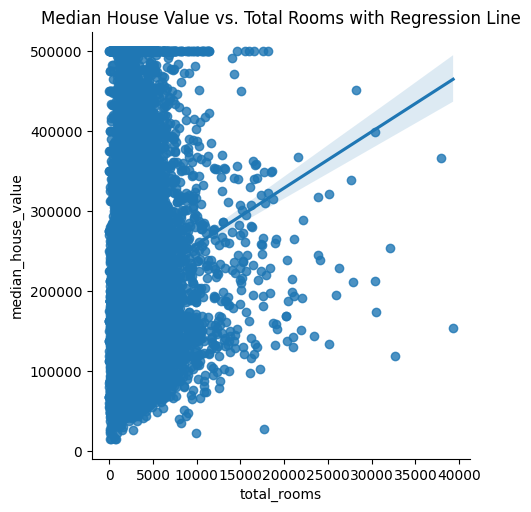

In [15]:
sns.scatterplot(x='total_rooms', y='median_house_value', data=df)
plt.title('Median House Value vs. Total Rooms')
plt.show()

sns.lmplot(x='total_rooms', y='median_house_value', data=df)
plt.title('Median House Value vs. Total Rooms with Regression Line')
plt.show()

`Observations`

1. Distribution of Data Points:
- The scatter plot shows individual data points representing different properties.
- Most of the points are concentrated in the lower left quadrant of the graph.
- This suggests that houses with fewer rooms tend to have lower median values.

2. Total Rooms vs. Median House Value Trend:
- As the number of total rooms increases, there appears to be a slight upward trend indicating an increase in median house values.
- However, this trend is not strong or consistent across the entire range.
- Some outliers exist where dwellings with a high number of total rooms do not necessarily correspond to higher median house values.
3. Variability in House Prices:
- The spread of median house values widens as the number of total rooms increases.
- This suggests more variability in house prices in areas with more rooms.
4. No Clear Upper or Lower Limit:
- There does not appear to be any clear upper or lower limit on the median house value for any given number of rooms.

### Median House Value vs. Median Income

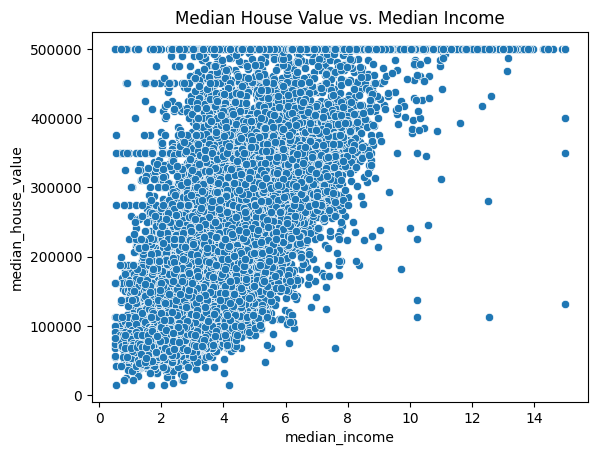

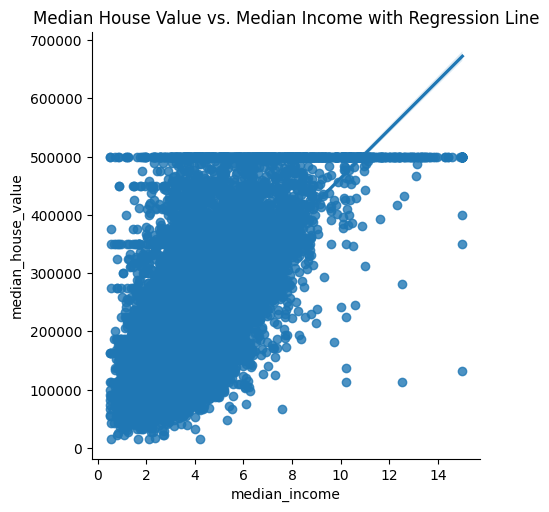

In [16]:
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title('Median House Value vs. Median Income')
plt.show()

sns.lmplot(x='median_income', y='median_house_value', data=df)
plt.title('Median House Value vs. Median Income with Regression Line')
plt.show()

`Observation`

1. Distribution of Data Points:
- The scatter plot shows individual data points representing different properties.
- Most of the points are concentrated in the lower left quadrant of the graph.
- This suggests that houses with lower median incomes tend to have lower median values.
2. Median Income vs. Median House Value Trend:
- As the median income increases, there is a positive correlation with higher median house values.
- However, this trend is not strong or consistent across the entire range.
- Some outliers exist where dwellings with high median incomes do not necessarily correspond to significantly higher median house values.
3. Variability in House Prices:
- The spread of median house values widens as the median income increases.
- This indicates more variability in house prices in areas with higher incomes.
4. No Clear Upper or Lower Limit:
- There does not appear to be any clear upper or lower limit on the median house value for any given median income.

### Median House Value vs. Housing Median Age

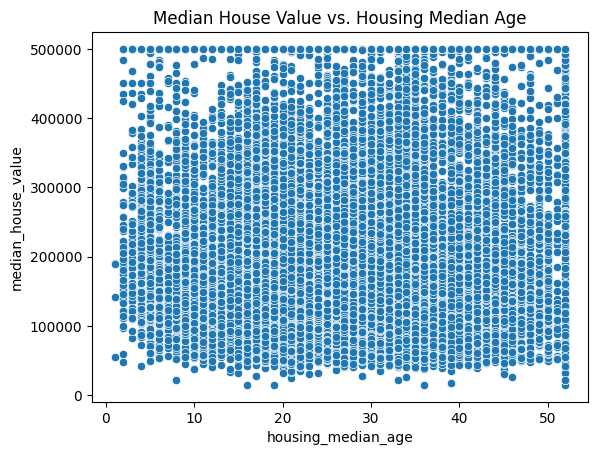

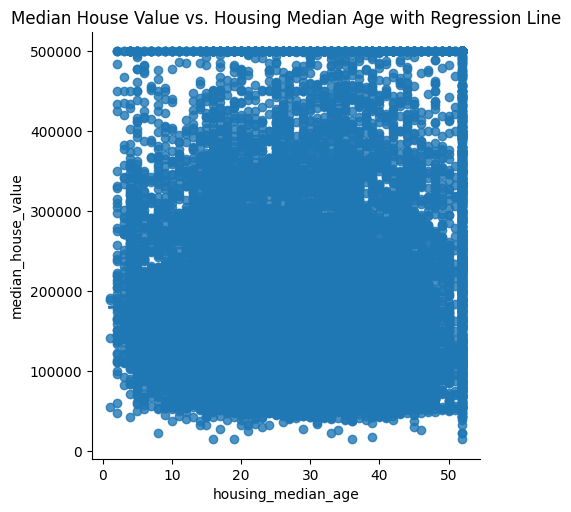

In [17]:
sns.scatterplot(x='housing_median_age', y='median_house_value', data=df)
plt.title('Median House Value vs. Housing Median Age')
plt.show()

sns.lmplot(x='housing_median_age', y='median_house_value', data=df)
plt.title('Median House Value vs. Housing Median Age with Regression Line')
plt.show()

`Observation`

1. Distribution of Data Points:
- The scatter plot shows individual data points representing different properties.
- Most of the points are concentrated in the lower left quadrant of the graph.
- This suggests that houses with lower median ages tend to have lower median values.
2. Median Age vs. Median House Value Trend:
- As the housing median age increases, there is no clear linear relationship with median house values.
- However, there seems to be a slight concentration of higher-value houses at a lower housing median age.
- The spread of house values widens as the housing median age increases, but there is no distinct trend in terms of increasing or decreasing house values with age.
3. Variability in House Prices:
- The lack of a strong trend indicates that other factors beyond age play a significant role in determining house values.
4. Relevance and Interpretation:
This graph attempts to visualize any potential correlation between the age of houses and their value.
It can be relevant for real estate markets, property investment, and urban development studies.

## Multivariate Analysis Visualizations

### Combined Effect of Total Bedrooms, Population, and Households on Median House Value

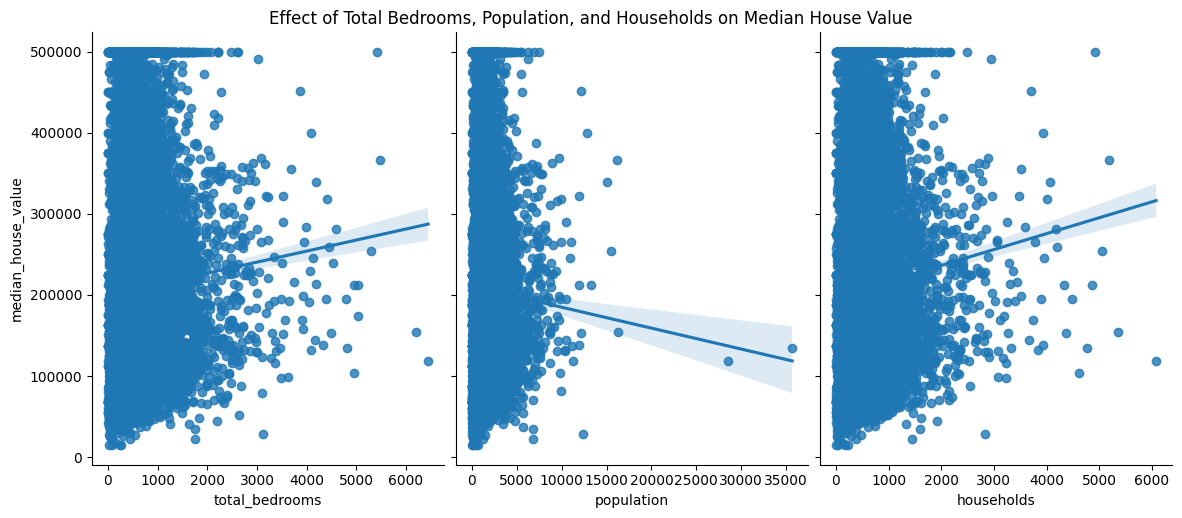

In [18]:
sns.pairplot(df, x_vars=['total_bedrooms', 'population', 'households'], y_vars='median_house_value', height=5, aspect=0.8, kind='reg')
plt.suptitle('Effect of Total Bedrooms, Population, and Households on Median House Value', y=1.02)
plt.show()

`Observations`

1. Effect of Total Bedrooms on Median House Value:
- As the number of total bedrooms increases, there is a slight positive trend in median house value.
- Data points are densely packed at lower numbers of total bedrooms and spread out as the number increases.
- Variability in house values exists for properties with a higher number of bedrooms.

2. Effect of Population on Median House Value:
- There is no clear trend indicating that an increase in population leads to higher or lower median house values.
- The scatter plot points are more dispersed across all levels of population compared to total bedrooms.
- The confidence interval is wide, suggesting less certainty about the effect of population on house value.
3. Effect of Households on Median House Value:
- Similar to total bedrooms, there is a slight positive correlation between households and median house value.
- Data points are concentrated at lower numbers of households and become less dense as households increase.
- The confidence interval here also suggests variability but appears slightly narrower than in the total bedrooms plot.

### Influence of Median Income and Total Rooms on House Prices

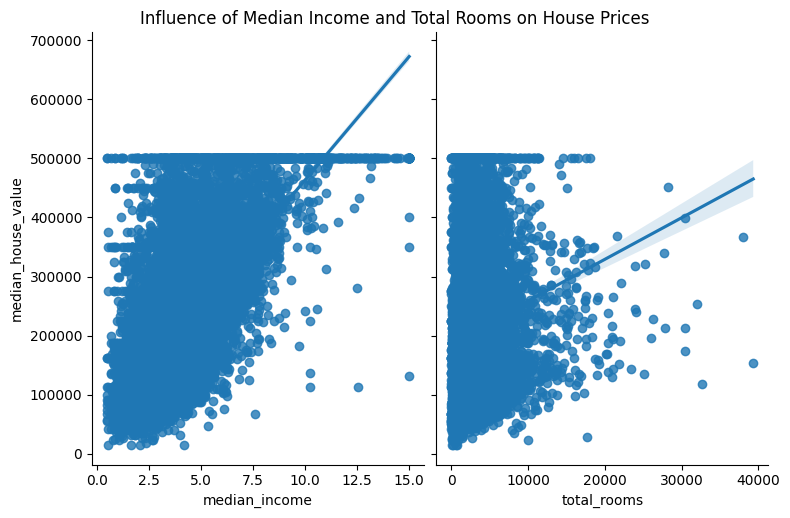

In [19]:
sns.pairplot(df, x_vars=['median_income', 'total_rooms'], y_vars='median_house_value', height=5, aspect=0.8, kind='reg')
plt.suptitle('Influence of Median Income and Total Rooms on House Prices', y=1.02)
plt.show()

`Observation`

1. Effect of Median Income on Median House Value:
- The left scatter plot shows the relationship between median income (x-axis) and median house value (y-axis).
- There is a positive correlation indicated by the upward-sloping trend line.
- As the median income increases from 0 to 15 (units not specified), there is a general increase in the median house value, ranging approximately from 100,000 to 500,000 (units not specified).
- The confidence interval suggests variability in house values for properties with higher median incomes.
2. Effect of Total Rooms on Median House Value:
- The right scatter plot shows total rooms (x-axis) plotted against median house value (y-axis).
- There is also a positive correlation, but it appears weaker compared to the first plot.
- Data points are more dispersed across all levels of total rooms.
- The total rooms range from 0 to approximately 40,000, with corresponding median house prices ranging roughly from below 100,000 to slightly above 500,000.

### Impact of Population Density and Median Income on Median House Value

In [ ]:
df['population_density'] = df['population'] / df['households']
sns.lmplot(x='population_density', y='median_house_value', hue='median_income', data=df)
plt.title('Impact of Population Density and Median Income on Median House Value')
plt.show()

### Regional Analysis of House Prices with Respect to Multiple Variables

In [21]:
#sns.pairplot(df, hue='region', x_vars=['total_rooms',
                                      # 'median_income', 'housing_median_age'], y_vars='median_house_value', height=5, aspect=0.8, kind='reg')
#plt.suptitle('Regional Analysis of House Prices with Respect to Multiple Variables', y=1.02)
#plt.show()

### Data Preprocessing

In [22]:
df.drop(columns=['population_density'],inplace=True)

In [23]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [24]:
df['ocean_proximity'] = df['ocean_proximity'].map({"<1H OCEAN":0,
                                                   "INLAND":1, "NEAR OCEAN":2, "NEAR BAY":3, "ISLAND":4})

In [25]:
x = df.drop('median_house_value', axis=1)
y = df['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (16346, 9)
x_test (4087, 9)
y_train (16346,)
y_test (4087,)


### Scaling

In [26]:
mms = MinMaxScaler()

x_train = pd.DataFrame(mms.fit_transform(x_train))
x_test = pd.DataFrame(mms.transform(x_test))

### Model Architecture and Training

In [27]:
model = Sequential()

model.add(Dense(1000, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              10000     
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 dense_3 (Dense)             (None, 100)               25100     
                                                                 
 dense_4 (Dense)             (None, 1)                 1

In [28]:
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])
es = EarlyStopping(monitor='val_loss', mode= 'min', patience=50, restore_best_weights=True)

In [29]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[es], epochs=25, batch_size=50, verbose=1)

Epoch 1/25
327/327 [==============================] - 7s 18ms/step - loss: 16580664320.0000 - mean_absolute_error: 97822.4141 - val_loss: 8102355968.0000 - val_mean_absolute_error: 70978.1797
Epoch 2/25
327/327 [==============================] - 5s 14ms/step - loss: 6271922688.0000 - mean_absolute_error: 59340.0156 - val_loss: 5869027840.0000 - val_mean_absolute_error: 56217.0742
Epoch 3/25
327/327 [==============================] - 6s 17ms/step - loss: 5659300864.0000 - mean_absolute_error: 54836.8281 - val_loss: 5551828992.0000 - val_mean_absolute_error: 54055.4531
Epoch 4/25
327/327 [==============================] - 5s 16ms/step - loss: 5319738368.0000 - mean_absolute_error: 52813.2305 - val_loss: 5190815744.0000 - val_mean_absolute_error: 52220.4062
Epoch 5/25
327/327 [==============================] - 4s 13ms/step - loss: 5046983168.0000 - mean_absolute_error: 50976.4648 - val_loss: 4965814272.0000 - val_mean_absolute_error: 49294.6992
Epoch 6/25
327/327 [========================

### Model Results and Predictions

In [30]:
y_pred = model.predict(x_test)

128/128 [==============================] - 1s 5ms/step


In [31]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.7035739960860056
MSE: 4053679193.2098517
MAE: 43947.07773719454


### Plotting the model's performance

Text(0.5, 0, 'Epochs')

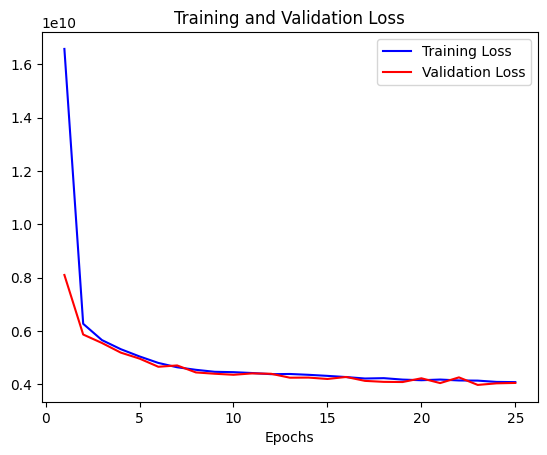

In [32]:
training_loss = history.history['loss']
validation_los = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_los, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.xlabel('Epochs')

### Predictive System

In [33]:
import numpy as np

def pred(longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population,
         households, median_income, ocean_proximity):
    # Creating the features array
    features = np.array([longitude, latitude, housing_median_age, total_rooms, total_bedrooms,
                         population, households, median_income, ocean_proximity]).reshape(1, -1)

    # Scaling the features
    features_scaled = mms.transform(features)  # Assuming mms is already fit on the training data

    # Predicting the result
    result = model.predict(features_scaled)

    return result[0]

# Define the input features
longitude = -122.2300
latitude = 37.8800
housing_median_age = 41.0000
total_rooms = 880.0000
total_bedrooms = 129.0000
population = 322.0000
households = 126.0000
median_income = 8.3252
ocean_proximity = 3.0000

# Predict the price
price = pred(longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity)

# Print the predicted price
print(price)


1/1 [==============================] - 0s 86ms/step
[400603.66]


In [34]:
price

array([400603.66], dtype=float32)

### Saving the model

In [35]:
model.save("Model_ANN.h5")
import pickle
pickle.dump(mms,open('scaler.pkl','wb'))


### Check the version and install the same in vscode (in production)

In [36]:
import sklearn
import tensorflow as tf
import keras


print("Scikit-Learn version:" ,sklearn.__version__)
print("Tesnorflow version:", tf.__version__)
print("Keras version:", keras.__version__)

Scikit-Learn version: 1.2.2
Tesnorflow version: 2.15.0
Keras version: 2.15.0


# <FONT COLOR='BROWN'> CONCLUSION